# [Hackaton WorldCalss](http://www.forbes.ru/sp/microsoft/)

Определите вероятность перехода каждого клиента компании в статус бывшего члена клуба, достигнув максимального значения по статистической метрике качества *AUC ROC*

## Variables

### Contracts
- КодКлиента                         
- КодКонтракта                       
- **REMADE** КодНоменклатуры                    
- **REMADE** ДатаНачалаСрокаДействия            
- **REMADE**ДатаОкончанияСрокаДействия         
- **REMADE** ВидСтажаНаНачалоМесяца             
- **REMADE** ВидСтажаВМоментПриобретения        
- **REMADE** ВидДоговора                    
- **FIXED** БонусыОстаток                    
- **REMADE** ДлительностьКонтракта              
- **GOOD** Переоформлялся                     
- **REMADE** ВозрастнаяКатегория                
- **REMADE** СегментКлуба                       
- **GOOD** КоличествоПлатныхСодоступов        
- **GOOD** ОстатокДнейЗаморозок               
- **REMADE** КупленоВсегоЗаморозок 

### To Dummies:
- Exp_beg_month
- Exp_at_purchase
- Переоформлялся
- age_group
- club_segment
- bounght_freeze
- contr_type
- nom_lev

### To Drop:
- ВидСтажаНаНачалоМесяца
- ВидСтажаВМоментПриобретения
- ДатаНачалаСрокаДействия
- ДатаОкончанияСрокаДействия
- Возрастная категория
- СегментКлуба
- КупленоВсегоЗаморозок
- ДлительностьКонтракта
- ВидДоговора
- БонусыОстаток
- КодНоменклатуры

### All your data belongs to us!

- So far we have two fractions of data - one from December (train set), the other from March (test set)
- Both have four datasets in each, somehow we need to concatenate all of them into one large matrix
- First of all, I'll connect pairwisely the similar datasets from test and train

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import array, newaxis

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

## Contracts

In [4]:
cont_train = pd.read_csv('C://Users//Auditore//Desktop//MicrosoftHack//December//contracts.csv', encoding = 'cp1251')
cont_test = pd.read_csv('C://Users//Auditore//Desktop//MicrosoftHack//March//contracts.csv', encoding = 'cp1251')

In [5]:
#cont_train.info()

In [6]:
#cont_test.info()

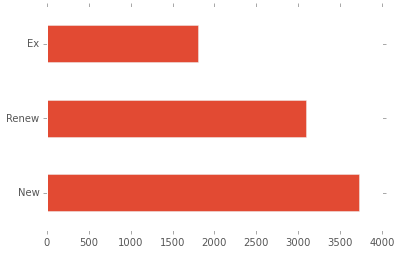

In [152]:
%matplotlib inline
cont_train.ВидСтажаВМоментПриобретения.value_counts().plot(kind='barh')
plt.style.use('ggplot')

In [8]:
prodlilsya = cont_train.Продлился
cont_train.drop(['Продлился'], axis = 1, inplace = True)

In [9]:
cont_train['Test'] = False
cont_test['Test'] = True
cont_data = pd.concat([cont_train, cont_test], ignore_index=True)

In [10]:
cont_data.head()

,КодКлиента,КодКонтракта,КодНоменклатуры,ДатаНачалаСрокаДействия,ДатаОкончанияСрокаДействия,ВидСтажаНаНачалоМесяца,ВидСтажаВМоментПриобретения,ВидДоговора,БонусыОстаток,ДлительностьКонтракта,Переоформлялся,ВозрастнаяКатегория,СегментКлуба,КоличествоПлатныхСодоступов,ОстатокДнейЗаморозок,КупленоВсегоЗаморозок,Test
0,3101,29908,36109,21.11.2014,20.12.2015,Renew,Renew,NaN,390,365,0,Взрослые,Lower,0,0,0,False
1,3120,28457,99,26.06.2015,24.12.2015,Renew,Ex,NaN,645.14,182,0,Взрослые,Lower,0,0,0,False
2,3126,8230,99,29.10.2014,27.12.2015,Renew,Renew,NaN,6 275.96,395,0,Взрослые,Upper,0,0,0,False
3,3153,8121,99,02.12.2014,15.12.2015,Renew,Renew,NaN,0.72,365,0,Взрослые,Upper,0,16,0,False
4,3156,29730,36109,16.11.2014,11.12.2015,Renew,Renew,NaN,520,365,0,Взрослые,Lower,0,4,0,False


# It's Engineering time!
---

In [11]:
cont_data.isnull().sum()

КодКлиента                         1
КодКонтракта                       0
КодНоменклатуры                    0
ДатаНачалаСрокаДействия            1
ДатаОкончанияСрокаДействия         0
ВидСтажаНаНачалоМесяца             0
ВидСтажаВМоментПриобретения        1
ВидДоговора                    13841
БонусыОстаток                    312
ДлительностьКонтракта              1
Переоформлялся                     0
ВозрастнаяКатегория                0
СегментКлуба                       0
КоличествоПлатныхСодоступов        0
ОстатокДнейЗаморозок               0
КупленоВсегоЗаморозок              0
Test                               0
dtype: int64

---
- ВидСтажаНаНачалоМесяца

In [12]:
cont_data.ВидСтажаНаНачалоМесяца.value_counts()

Renew    9184
New      8446
Ex          2
dtype: int64

In [13]:
cont_data['Exp_beg_month'] = le.fit_transform(cont_data.ВидСтажаНаНачалоМесяца)

In [14]:
cont_data.Exp_beg_month.value_counts()

2    9184
1    8446
0       2
dtype: int64

---

- ВидСтажаВМоментПриобретения

In [15]:
cont_data.index[cont_data.ВидСтажаВМоментПриобретения.isnull()]

Int64Index([17440], dtype='int64')

In [16]:
cont_data.loc[17440, 'ВидСтажаВМоментПриобретения'] = 'New'

In [17]:
cont_data['Exp_at_purchase'] = le.fit_transform(cont_data.ВидСтажаВМоментПриобретения)

In [18]:
cont_data.Exp_at_purchase.value_counts()

1    7647
2    6268
0    3717
dtype: int64

---

- ДатаНачалаСрокаДействия
- ДатаОкончанияСрокаДействия
- ДлительностьКонтракта

In [19]:
cont_data.index[cont_data.ДатаНачалаСрокаДействия.isnull()]

Int64Index([6499], dtype='int64')

In [20]:
cont_data.loc[6499, 'ДатаОкончанияСрокаДействия']

'30.12.2015'

In [21]:
cont_data.loc[6499, 'ДлительностьКонтракта']

365.0

In [24]:
cont_data.loc[6499, 'ДатаНачалаСрокаДействия'] = '30.12.2014'

In [25]:
dates_begin = pd.to_datetime(cont_data.ДатаНачалаСрокаДействия, format = '%d.%m.%Y')
dates_end = pd.to_datetime(cont_data.ДатаОкончанияСрокаДействия, format = '%d.%m.%Y')

In [26]:
cont_data['Cont_length'] = dates_end-dates_begin

In [27]:
cont_data['Cont_length'] = cont_data['Cont_length'].apply(lambda x: x / np.timedelta64(1,'D'))

- Adding columns with month and day of purchase 

In [28]:
cont_data['beg_month'] = dates_begin.apply(lambda x: x.month)
cont_data['beg_day'] = dates_begin.apply(lambda x: x.day)

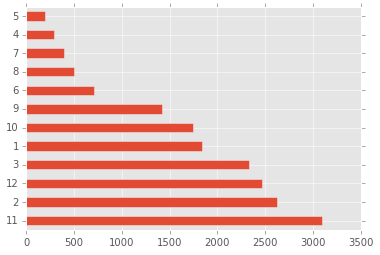

In [29]:
cont_data.beg_month.value_counts().plot(kind='barh')

- Maybe it will be useful to know, what was the season when the purchase was made

In [30]:
def get_season(month):
    if month <= 2 or month==12:
        season = 0
    elif 2<month<=5:
        season = 1
    elif 5<month<=8:
        season = 2
    else:
        season = 3
    return season

In [31]:
for month in cont_data.beg_month.unique():
    cont_data.loc[cont_data.index[cont_data.beg_month==month], 'Season'] = get_season(month)

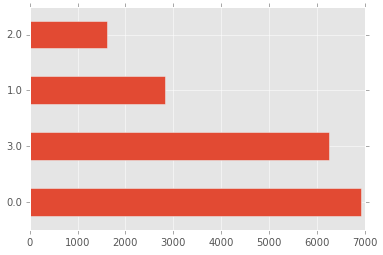

In [32]:
cont_data.Season.value_counts().plot(kind='barh')

In [33]:
cont_data.index[cont_data.ДлительностьКонтракта.isnull()]

Int64Index([17440], dtype='int64')

In [34]:
cont_data.loc[17440, 'ДлительностьКонтракта'] = cont_data.loc[17440, 'Cont_length']

---

- ВидДоговора

In [35]:
cont_data.ВидДоговора.value_counts()

Корпоративный              2967
Индивидуальный              777
Групповой                    45
Члены семей сотрудников       2
dtype: int64

---
- Переоформлялся

In [36]:
cont_data.ВозрастнаяКатегория.value_counts()

Взрослые    16379
Kids         1136
Teens         117
dtype: int64

In [37]:
cont_data['age_group'] = le.fit_transform(cont_data.ВозрастнаяКатегория)

In [38]:
cont_data.age_group.value_counts()

2    16379
0     1136
1      117
dtype: int64

---
- СегментКлуба

In [39]:
cont_data.СегментКлуба.value_counts()

Lite       6360
Lower      5760
Upper      4941
Lux         540
Жуковка      31
dtype: int64

In [40]:
cont_data['club_segment'] = le.fit_transform(cont_data.СегментКлуба)

In [41]:
cont_data.club_segment.value_counts()

0    6360
1    5760
3    4941
2     540
4      31
dtype: int64

---
- ОстатокДнейЗаморозок

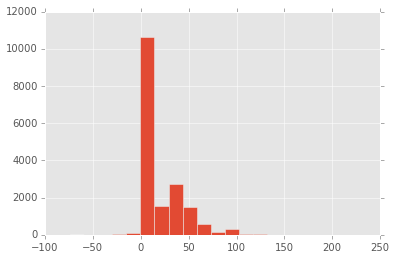

In [42]:
cont_data.ОстатокДнейЗаморозок.hist(bins=20)

In [43]:
cont_data.КупленоВсегоЗаморозок.value_counts()

0      17489
30       115
60        23
90         3
120        2
dtype: int64

In [44]:
cont_data['bought_freeze'] = le.fit_transform(cont_data.КупленоВсегоЗаморозок)

In [45]:
cont_data.bought_freeze.value_counts()

0    17489
1      115
2       23
3        3
4        2
dtype: int64

---
- БонусыОстаток

In [46]:
def get_number(value):
    try:
        value = value.split(' ')
        clean = ''
        for i in value:
            clean += i
        return float(clean)
    except:
        return value
    
get_number('5 100.47')

5100.47

In [47]:
cont_data['bonus_left'] = cont_data.БонусыОстаток[:]
for row in range(0, len(cont_data)):
    cont_data.loc[row, 'bonus_left'] = get_number(cont_data.БонусыОстаток[row])

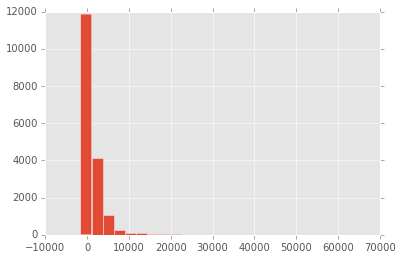

In [355]:
cont_data.bonus_left.hist(bins=25)

In [49]:
cont_data.loc[cont_data.bonus_left.isnull(), 'bonus_left'] = 0

---
- ВидДоговора

In [50]:
cont_data.ВидДоговора.value_counts()

Корпоративный              2967
Индивидуальный              777
Групповой                    45
Члены семей сотрудников       2
dtype: int64

In [51]:
cont_data.groupby('ВидДоговора')['Cont_length'].mean()

ВидДоговора
Групповой                  291.022222
Индивидуальный             378.962677
Корпоративный              349.448264
Члены семей сотрудников     35.000000
Name: Cont_length, dtype: float64

In [52]:
cont_data.ВидДоговора.isnull().sum()/len(cont_data)

0.78499319419237745

In [53]:
cont_data.loc[cont_data.ВидДоговора.isnull(), 'ВидДоговора'] = 'other'

In [54]:
cont_data['contr_type'] = le.fit_transform(cont_data.ВидДоговора)

In [55]:
cont_data.contr_type.value_counts()

0    13841
3     2967
2      777
1       45
4        2
dtype: int64

---
- КодНоменклатуры

In [56]:
cont_data.КодНоменклатуры.value_counts()[:6]

99       12973
36109     1265
101       1051
36110      375
4132       334
107        174
dtype: int64

In [57]:
nom_freq = set(cont_data.КодНоменклатуры.value_counts()[:6].index)

In [58]:
nom_freq

{99, 101, 107, 4132, 36109, 36110}

In [59]:
cont_data['nom_lev'] = cont_data.КодНоменклатуры.apply(lambda x: x if x in nom_freq else 0)

In [60]:
cont_data.nom_lev = le.fit_transform(cont_data.nom_lev)

---

# Attendance

## To Drop

- ОкончаниеПосещения
- Длительность
- НаправлениеУслуги

In [328]:
att_train = pd.read_csv('C://Users//Auditore//Desktop//MicrosoftHack//December//attendance.csv', encoding = 'cp1251')
att_test = pd.read_csv('C://Users//Auditore//Desktop//MicrosoftHack//March//attendance.csv', encoding = 'cp1251')

In [329]:
att_train.shape, att_test.shape

((1600228, 7), (3129134, 7))

In [330]:
att_train['Test'] = False
att_test['Test'] = True
att_data = pd.concat([att_train, att_test], ignore_index=True)

In [331]:
att_data.head()

,КодКлиента,Дата,НачалоПосещения,ОкончаниеПосещения,КатегорияТренера,Длительность,НаправлениеУслуги,Test
0,67900,03.08.2015 13:43,03.08.2015 13:43,03.08.2015 15:34,NaN,NaN,NaN,False
1,221825,03.08.2015 12:26,03.08.2015 12:26,03.08.2015 15:37,NaN,NaN,NaN,False
2,3350,03.08.2015 13:41,03.08.2015 13:41,03.08.2015 15:37,NaN,NaN,NaN,False
3,6921,03.08.2015 13:37,03.08.2015 13:37,03.08.2015 15:37,NaN,NaN,NaN,False
4,492725,03.08.2015 14:48,03.08.2015 14:48,03.08.2015 15:38,NaN,NaN,NaN,False


#### Now that's a lot of missed data to handle...

In [332]:
att_data.isnull().sum()

КодКлиента                  0
Дата                        0
НачалоПосещения       1010073
ОкончаниеПосещения    1010073
КатегорияТренера      3893304
Длительность          3822954
НаправлениеУслуги     3719293
Test                        0
dtype: int64

**Cool disbalance: in attendance dataset we have *126333* unique clients, while only *17517* clients have contracts**

In [333]:
len(att_data.КодКлиента.unique()), len(cont_data.КодКлиента.unique())

(126333, 17517)

In [334]:
sum(att_data.НачалоПосещения != att_data.Дата)

1010073

НачалоПосещения = Дата => drop it!

In [335]:
att_data.drop(['НачалоПосещения'], axis = 1, inplace = True)

Obvious variable - length of visit

- What was the day and the month a person attended the gym

In [336]:
att_data['visit_end'] = att_data.ОкончаниеПосещения[:]
att_data.loc[att_data.ОкончаниеПосещения.isnull(), 'visit_end'] = '01.01.0000 00:00'

In [337]:
from dateutil.parser import parse

In [338]:
print(parse('01.01.2015 00:00'))

2015-01-01 00:00:00


In [339]:
att_data.visit_end = att_data.visit_end.apply(parse)

In [340]:
att_data.Дата = att_data.Дата.apply(parse)

In [341]:
delta = att_data.visit_end - att_data.Дата
att_data['visit_length'] = delta/np.timedelta64(1,'m')

In [342]:
mean_length = att_data.visit_length[(att_data.visit_length>0) & (att_data.visit_length<1000)].mean()

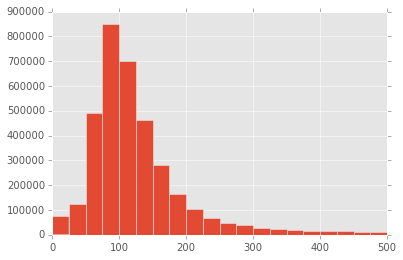

In [343]:
att_data.visit_length[(att_data.visit_length>0)&(att_data.visit_length<500)].hist(bins=20)

- Such a beautiful log-normal distribution...

In [344]:
att_data.loc[(att_data.visit_length<0)|(att_data.visit_length>1000), 'visit_length'] = mean_length

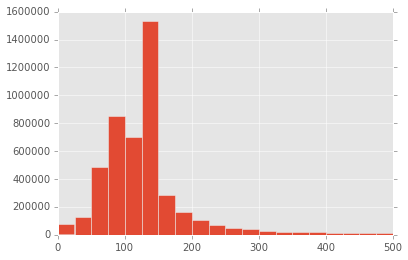

In [345]:
att_data.visit_length[(att_data.visit_length>0)&(att_data.visit_length<500)].hist(bins=20)

- Not that beautiful anymore, but no missing points, so I got that going for me which is nice

In [346]:
att_data.head()

,КодКлиента,Дата,ОкончаниеПосещения,КатегорияТренера,Длительность,НаправлениеУслуги,Test,visit_end,visit_length
0,67900,2015-03-08 13:43:00,03.08.2015 15:34,NaN,NaN,NaN,False,2015-03-08 15:34:00,111
1,221825,2015-03-08 12:26:00,03.08.2015 15:37,NaN,NaN,NaN,False,2015-03-08 15:37:00,191
2,3350,2015-03-08 13:41:00,03.08.2015 15:37,NaN,NaN,NaN,False,2015-03-08 15:37:00,116
3,6921,2015-03-08 13:37:00,03.08.2015 15:37,NaN,NaN,NaN,False,2015-03-08 15:37:00,120
4,492725,2015-03-08 14:48:00,03.08.2015 15:38,NaN,NaN,NaN,False,2015-03-08 15:38:00,50


In [347]:
len(cont_data.КодКлиента.unique())

17517

In [348]:
count = 0
good_clients = []
contracts = cont_data.КодКлиента.unique()
for user in att_data.КодКлиента.unique():
    if user in contracts:
        good_clients.append(user)
        count+=1
print(count)

15217


- So, we have 15217 users in attendance dataset that are found in contracts dataset too, which is nice. 


- **Now I want to subset only those rows of the att_data, that have those "good" clients**

In [349]:
att_data['boolean'] = att_data.КодКлиента.apply(lambda x: x in contracts)

In [350]:
subset = att_data.boolean
att_data.drop(['boolean'], axis = 1, inplace = True)

In [351]:
att_data_subset = att_data[subset]

In [352]:
len(att_data_subset)

716808

In [353]:
att_data_subset.drop(['Длительность'], axis = 1, inplace = True)

C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [356]:
att_data_subset.head()

,КодКлиента,Дата,ОкончаниеПосещения,КатегорияТренера,НаправлениеУслуги,Test,visit_end,visit_length
2,3350,2015-03-08 13:41:00,03.08.2015 15:37,NaN,NaN,False,2015-03-08 15:37:00,116
6,437943,2015-03-08 13:52:00,03.08.2015 15:38,NaN,NaN,False,2015-03-08 15:38:00,106
12,639877,2015-03-08 13:05:00,03.08.2015 15:39,NaN,NaN,False,2015-03-08 15:39:00,154
15,549296,2015-03-08 13:33:00,03.08.2015 15:43,NaN,NaN,False,2015-03-08 15:43:00,130
20,270778,2015-03-08 13:40:00,03.08.2015 15:48,NaN,NaN,False,2015-03-08 15:48:00,128


- Finally, I want to create a *"clean"* dataset, where **new** observations (those that happened later than December 2015) would be only in Test data and **old** observations would be left solemly in Train dataset

In [366]:
sub_list = att_data_subset[['КодКлиента', 'Дата', "ОкончаниеПосещения", "КатегорияТренера", "НаправлениеУслуги", "visit_end", "visit_length"]]

In [372]:
clean_att_data_subset =  att_data_subset[~sub_list.duplicated()]

In [383]:
#clean_att_data_subset[clean_att_data_subset.КодКлиента==549296]

In [386]:
clean_att_data_subset.head()

,КодКлиента,Дата,ОкончаниеПосещения,КатегорияТренера,НаправлениеУслуги,Test,visit_end,visit_length
2,3350,2015-03-08 13:41:00,03.08.2015 15:37,NaN,NaN,False,2015-03-08 15:37:00,116
6,437943,2015-03-08 13:52:00,03.08.2015 15:38,NaN,NaN,False,2015-03-08 15:38:00,106
12,639877,2015-03-08 13:05:00,03.08.2015 15:39,NaN,NaN,False,2015-03-08 15:39:00,154
15,549296,2015-03-08 13:33:00,03.08.2015 15:43,NaN,NaN,False,2015-03-08 15:43:00,130
20,270778,2015-03-08 13:40:00,03.08.2015 15:48,NaN,NaN,False,2015-03-08 15:48:00,128


In [373]:
clean_att_data_subset.Test.value_counts()

False    258168
True     194331
dtype: int64

- Great! Now that I have data with only the nessessary clients I can create some summary statistics for each of the unique cliens

### It's grouping time

What has to be done:
- Instead of having multiple rows for each client, create a single row with all the information

In [391]:
clean_att_data_subset[clean_att_data_subset.КодКлиента==549296]

,КодКлиента,Дата,ОкончаниеПосещения,КатегорияТренера,НаправлениеУслуги,Test,visit_end,visit_length
15,549296,2015-03-08 13:33:00,03.08.2015 15:43,Другое,NaN,False,2015-03-08 15:43:00,130.000000
35044,549296,2015-06-08 18:49:00,06.08.2015 20:07,Другое,NaN,False,2015-06-08 20:07:00,78.000000
132615,549296,2015-08-19 13:00:00,19.08.2015 15:05,Другое,NaN,False,2015-08-19 15:05:00,125.000000
341891,549296,2015-04-09 13:05:00,04.09.2015 15:15,Другое,NaN,False,2015-04-09 15:15:00,130.000000
3240964,549296,2015-04-12 12:38:36,04.12.2015 14:15:32,Другое,NaN,True,2015-04-12 14:15:32,96.933333
3298143,549296,2015-07-12 12:57:38,07.12.2015 15:08:22,Другое,NaN,True,2015-07-12 15:08:22,130.733333
3371408,549296,2015-09-12 11:28:24,09.12.2015 13:17:13,Другое,NaN,True,2015-09-12 13:17:13,108.816667
3463344,549296,2015-12-29 14:02:11,29.12.2015 15:17:39,Другое,NaN,True,2015-12-29 15:17:39,75.466667
3492737,549296,2015-12-12 11:26:33,12.12.2015 13:09:40,Другое,NaN,True,2015-12-12 13:09:40,103.116667
3562067,549296,2015-12-15 12:25:50,15.12.2015 14:39:24,Другое,NaN,True,2015-12-15 14:39:24,133.566667


### КатегорияТренера

NaN => Другое

In [390]:
clean_att_data_subset.ix[clean_att_data_subset.КатегорияТренера.isnull(), 'КатегорияТренера'] = "Другое"

C:\Users\Auditore\Anaconda3\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Shrink the number of categories:
- Сотрудник СПА + Врач = "additional"
- Тренер мастер + Тренер фитнес = "coach"
- Тренер персональный + Тренер элит = "coach_vip"
- Другое = "other"

In [428]:
additional = ['Сотрудник СПА', 'Врач']
coach = ['Тренер мастер', "Тренер фитнес"]
coach_vip = ["Тренер персональный", "Тренер элит"]
other = ['Другое']

In [429]:
clean_att_data_subset.КатегорияТренера.value_counts()

Другое                 385494
Тренер мастер           22388
Тренер персональный     15054
Сотрудник СПА           14675
Тренер элит              9387
Тренер фитнес            5418
Врач                       83
dtype: int64

In [430]:
clean_att_data_subset["additional"] = clean_att_data_subset.КатегорияТренера.apply(lambda x: int(x in additional))
clean_att_data_subset["coach"] = clean_att_data_subset.КатегорияТренера.apply(lambda x: int(x in coach))
clean_att_data_subset["coach_vip"] = clean_att_data_subset.КатегорияТренера.apply(lambda x: int(x in coach_vip))
clean_att_data_subset["other"] = clean_att_data_subset.КатегорияТренера.apply(lambda x: int(x in other))

C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

---
### Направление услуги

In [411]:
clean_att_data_subset.ix[clean_att_data_subset.НаправлениеУслуги.isnull(), 'НаправлениеУслуги'] = "Другое"

C:\Users\Auditore\Anaconda3\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [412]:
sport = ["Тренажерный зал", "Водные программы", "Аэробика", "Боевые искусства", "Mind Body", 
         "Танцевальные программы", "Игровые программы", "Йога", "Групповые программы"]

health_beauty = ["Солярий", "Парикмахерские услуги", "Лечебный массаж", "Маникюр, педикюр", "Массаж_SF",
                "Терапевтические процедуры", "Физиотерапевтические процедуры", "Косметические услуги",
                "Аппаратная косметология", "Окрашивание", "Аппаратная косметология_SF", "Врачи", "Врачи_SF",
                "Продажа косметических товаров", "Инъекции", "Прочие услуги SPA", "Лечебное питание", "Инъекции_SF", "SPA"]

In [413]:
other = []
for name in clean_att_data_subset.НаправлениеУслуги.unique():
    if name not in sport and name not in health_beauty:
        other.append(name)

In [423]:
clean_att_data_subset["sport_service"] = clean_att_data_subset.НаправлениеУслуги.apply(lambda x: int(x in sport))
clean_att_data_subset["health_beauty"] = clean_att_data_subset.НаправлениеУслуги.apply(lambda x: int(x in health_beauty))
clean_att_data_subset["other"] = clean_att_data_subset.НаправлениеУслуги.apply(lambda x: int(x in other))

C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [432]:
clean_att_data_subset.head()

,КодКлиента,Дата,ОкончаниеПосещения,КатегорияТренера,НаправлениеУслуги,Test,visit_end,visit_length,sport_service,health_beauty,other,additional,coach,coach_vip
2,3350,2015-03-08 13:41:00,03.08.2015 15:37,Другое,Другое,False,2015-03-08 15:37:00,116,0,0,1,0,0,0
6,437943,2015-03-08 13:52:00,03.08.2015 15:38,Другое,Другое,False,2015-03-08 15:38:00,106,0,0,1,0,0,0
12,639877,2015-03-08 13:05:00,03.08.2015 15:39,Другое,Другое,False,2015-03-08 15:39:00,154,0,0,1,0,0,0
15,549296,2015-03-08 13:33:00,03.08.2015 15:43,Другое,Другое,False,2015-03-08 15:43:00,130,0,0,1,0,0,0
20,270778,2015-03-08 13:40:00,03.08.2015 15:48,Другое,Другое,False,2015-03-08 15:48:00,128,0,0,1,0,0,0


Now to preserve the time structure of the dataset, it is nessessary to create yet another variable - visit_frequency

In [439]:
clean_att_data_subset['Month'] = clean_att_data_subset.Дата.apply(lambda x: x.month)

C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [441]:
list(clean_att_data_subset)

['КодКлиента',
 'Дата',
 'ОкончаниеПосещения',
 'КатегорияТренера',
 'НаправлениеУслуги',
 'Test',
 'visit_end',
 'visit_length',
 'sport_service',
 'health_beauty',
 'other',
 'additional',
 'coach',
 'coach_vip',
 'Month']

In [449]:
sub_list = clean_att_data_subset[['sport_service', 'health_beauty', 'other','additional','coach','coach_vip']]

In [454]:
att_grouped = sub_list.groupby([clean_att_data_subset['КодКлиента'], 
                                clean_att_data_subset["Test"], 
                                clean_att_data_subset['Month'],
                                clean_att_data_subset['visit_length']]).sum()

In [456]:
att_grouped = pd.DataFrame(att_grouped.reset_index())

In [462]:
att_grouped.head()

,КодКлиента,Test,Month,visit_length,sport_service,health_beauty,other,additional,coach,coach_vip
0,1948,False,2,85,0,0,1,0,0,0
1,1948,False,2,101,0,0,1,0,0,0
2,1948,False,5,180,0,0,1,0,0,0
3,1948,False,7,134,0,0,1,0,0,0
4,1948,False,8,34,0,0,1,0,0,0


In [470]:
def get_season(value):
    if 3<=value<6:
        return 1
    elif 6<=value<9:
        return 2
    elif 9<=value<12:
        return 3
    else:
        return 0

In [474]:
att_grouped['season'] = att_grouped.Month.apply(lambda x: get_season(x))

In [496]:
attendance = pd.DataFrame()

In [497]:
import time
for client in att_grouped.КодКлиента.unique():
    
    attendance.loc[client, 'visit_length'] = att_grouped[att_grouped.КодКлиента==client].visit_length.mean()
    attendance.loc[client, 'sport_sevice'] = sum(att_grouped[att_grouped.КодКлиента==client].sport_service)
    attendance.loc[client, 'health_beauty'] = sum(att_grouped[att_grouped.КодКлиента==client].health_beauty)
    attendance.loc[client, 'other'] = sum(att_grouped[att_grouped.КодКлиента==client].other)
    attendance.loc[client, 'additional'] = sum(att_grouped[att_grouped.КодКлиента==client].additional)
    attendance.loc[client, 'coach'] = sum(att_grouped[att_grouped.КодКлиента==client].coach)
    attendance.loc[client, 'coach_vip'] = sum(att_grouped[att_grouped.КодКлиента==client].coach_vip)
    
    for season in range(0, 4):
        attendance.loc[client, 'season_'+str(season)] = sum(att_grouped[att_grouped.КодКлиента==client].season==season)

In [498]:
attendance.head()

,visit_length,sport_sevice,health_beauty,other,additional,coach,coach_vip,season_0,season_1,season_2,season_3
1948,167.044118,0,0,35,0,0,0,11,2,6,15
2392,132.575975,3,2,0,2,0,3,0,0,2,1
2626,122.925448,42,0,58,0,20,28,26,9,10,27
2634,120.934074,0,0,90,0,0,0,32,9,18,31
2637,206.509097,0,11,105,11,0,0,44,11,19,37


In [506]:
attendance = pd.DataFrame(attendance.reset_index())

In [508]:
attendance.rename(columns={'index': 'КодКлиента'}, inplace=True)

In [509]:
attendance.head()

,КодКлиента,visit_length,sport_sevice,health_beauty,other,additional,coach,coach_vip,season_0,season_1,season_2,season_3
0,1948,167.044118,0,0,35,0,0,0,11,2,6,15
1,2392,132.575975,3,2,0,2,0,3,0,0,2,1
2,2626,122.925448,42,0,58,0,20,28,26,9,10,27
3,2634,120.934074,0,0,90,0,0,0,32,9,18,31
4,2637,206.509097,0,11,105,11,0,0,44,11,19,37


In [510]:
attendance.to_pickle('C://Users//Auditore//Desktop//MicrosoftHack//attendance.pkl')

In [511]:
len(attendance)

15217

- Awesome command to merge two datasets, the left one remains unchanged, while only the values that match the key are saved from the right

In [512]:
merged_data = pd.merge(cont_data, attendance, on='КодКлиента', how='left')

In [516]:
merged_data.drop(['ВидСтажаНаНачалоМесяца', 
                  "ВидСтажаВМоментПриобретения",
                  "ДатаНачалаСрокаДействия",
                  "ДатаОкончанияСрокаДействия",
                  "СегментКлуба",
                  "КупленоВсегоЗаморозок",
                  "ДлительностьКонтракта",
                  "ВидДоговора",
                  "БонусыОстаток",
                  "КодНоменклатуры"], axis = 1, inplace = True)

In [518]:
merged_data.drop(['ВозрастнаяКатегория'], axis=1, inplace = True)

In [521]:
merged_data.isnull().sum()

КодКлиента                        1
КодКонтракта                      0
Переоформлялся                    0
КоличествоПлатныхСодоступов       0
ОстатокДнейЗаморозок              0
Test                              0
Exp_beg_month                     0
Exp_at_purchase                   0
Cont_length                       0
beg_month                         0
beg_day                           0
Season                            0
age_group                         0
club_segment                      0
bought_freeze                     0
bonus_left                        0
contr_type                        0
nom_lev                           0
visit_length                   2310
sport_sevice                   2310
health_beauty                  2310
other                          2310
additional                     2310
coach                          2310
coach_vip                      2310
season_0                       2310
season_1                       2310
season_2                    

In [522]:
merged_data.to_pickle('C://Users//Auditore//Desktop//MicrosoftHack//contracts_attend.pkl')